# Introduction (from Udacity)
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## Project Motivation
### Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## The Data
### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

### Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

So that's all fun and good. But all of this additional data will need to be gathered, assessed, and cleaned. This is where you come in.

## Key Points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (**no retweets**) that have **images**. Though there are 5000+ tweets in the dataset, **not all are dog** ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least **8 quality issues** and at least **2 tidiness issues** in this dataset.
- Cleaning includes **merging individual pieces** of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gather Data
Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: [`twitter_archive_enhanced.csv`](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Gather each tweet's **retweet count** and **favorite ("like") count** at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, 
- query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and 
- store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. 
- Each tweet's JSON data should be written to its own line. 
- Then read this .txt file line by line into a pandas DataFrame with (at minimum) **tweet ID**, **retweet count**, and **favorite count**.

*Note: do not include your Twitter API keys, secrets, and tokens in your project submission.*

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Download `image_predictions.tsv` programmatically using the [Requests](https://2.python-requests.org//en/master/) library

In [2]:
# Save the image_predictions_url
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
# Save the respons
response = requests.get(image_predictions_url)
#r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
# Check the response using `response.status_code`
if response.status_code == 200:
    with open("./image-predictions.tsv", "wb") as f:
        f.write(response.content)

In [5]:
# Read `image-predictions.tsv`
img_predictions = pd.read_csv('image-predictions.tsv',sep='\t')#,error_bad_lines=False)

### 3.-6. Gather each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive

In [6]:
#import tweepy   # already done
#import json     # already done

from tweepy import OAuthHandler 
# Into this we pass our consumer key and secret which was given to us, 
# see http://docs.tweepy.org/en/latest/auth_tutorial.html?highlight=OAuthHandler#oauth-1a-authentication

from timeit import default_timer as timer
# Measure execution time of small code snippets, 
# see https://docs.python.org/3/library/timeit.html

In [22]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# !!! The actual keys and tokens must be replaced by 'HIDDEN'
consumer_key = 'HIDDEN' 
consumer_secret = 'HIDDEN' 
access_token = 'HIDDEN' 
access_secret = 'HIDDEN' 

In [23]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Read `twitter-archive-enhanced.csv` to a dataframe
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [27]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print('time taken by the loop:',end - start)
print('fails_dict:',fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [10]:
#len(fails_dict)

### 7. Read the json .txt file line by line into a pandas DataFrame with (at minimum) **tweet ID**, **retweet count**, and **favorite count**

In [11]:
# create an empty list 
json_data = []
with open('tweet_json.txt', 'r') as json_file:
    text_line = json_file.readline()
    for text_line in json_file:
        #print(line)
        data_line = json.loads(text_line)
        tweet_id       = data_line['id']
        retweet_count  = data_line['retweet_count']
        favorite_count = data_line['favorite_count']
        #print('tweet_id:',tweet_id,'retweet_count:',retweet_count,'favorite_count:',favorite_count)
        # fill in the list
        json_data.append({'tweet_id':tweet_id,
                          'retweet_count':int(retweet_count),
                          'favorite_count':int(favorite_count)})
# fill in the Pandas Data Frame
tweets_df = pd.DataFrame(json_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])   

In [12]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,5900,31940
1,891815181378084864,3899,24055
2,891689557279858688,8096,40455
3,891327558926688256,8778,38673
4,891087950875897856,2918,19441


## Assess Data
- Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues**.
- To meet specifications, the issues that satisfy the Project Motivation (**see the Key Points** header) must be assessed.

### 1) the first file to assess: `twitter-archive-enhanced.csv`

In [13]:
# Convert to Pandas Data Frame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [14]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# Show the duplicates
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
# Count the sources
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# Check the lower case names
#twitter_archive_df[twitter_archive_df.name.str.islower()]
twitter_archive_df[twitter_archive_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
actually         2
not              2
mad              2
getting          2
this             1
my               1
infuriating      1
light            1
by               1
such             1
all              1
space            1
his              1
life             1
old              1
unacceptable     1
officially       1
incredibly       1
Name: name, dtype: int64

### 2) the second file to assess `image_predictions.tsv`

In [18]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Check the p1 values
img_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [21]:
# Check the number of dogs
img_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [22]:
# Chedk the number of images
img_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
# Show the duplicates
img_predictions[img_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
# Check the tweets with dogs
img_predictions[img_predictions.p1_dog == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [25]:
# Check the lower case dogs breeds 
img_predictions[(img_predictions.p1_dog == True) & (img_predictions.p1.str.islower())]
#img_predictions[(img_predictions.p1_dog == True) & (img_predictions.p1.str.upper())]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,0.075628,True
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
24,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True


### 3) the third file to assess `tweet_json.txt`

In [26]:
tweets_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892177421306343426,5900,31940
1,891815181378084864,3899,24055
2,891689557279858688,8096,40455
3,891327558926688256,8778,38673
4,891087950875897856,2918,19441


In [27]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
# show the duplicates
tweets_df[tweets_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


## Quality issues
#### twitter-archive-enhanced.csv
We need only original ratings (no retweets) that have images, however we have

1. replies: 78 , 
2. retweets: 181 , 
3. entries without images = entries without urls = 2356 entries - 2297 expanded_urls = 59.  
4. The columns *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp* are not needed.
5. The *timestamp* is object, while it should be date and time.
6. There are only four sources of images: *Twitter for iPhone*, *Vine - Make a Scene*, *Twitter Web Client*, and *TweetDeck*, which is not seen, because the full url is given.
7. Lower case names are not names

#### img_predictions
8. p1, p2, and p3 column names are unclear
9. The 543 images may be not dogs
- The underscore in the breed names is unnecessary
- The 619 breed names are lower case, but 1532-692 = 840 are upper case 

### Tidiness issues
1. Merge all the tables into the new one on 'tweet_id' index 

#### twitter-archive-enhanced.csv
2. The dog "stage" (i.e. doggo, floofer, pupper, and puppo) is a variable. The 'stage' should be one column.

## Clean

In [29]:
# Copy the existing tables to the new ones
#twitter_archive_clean = twitter_archive_df
img_predictions_clean = img_predictions
tweets_clean = tweets_df

### Define
- **Quality issues 1, 2, and 3**

**Delete all replies, retweets, and entries without images from `twitter_archive_df`** 

### Code

In [30]:
# Fill in the dataframe
twitter_archive_clean = twitter_archive_df[(twitter_archive_df.in_reply_to_user_id.notnull()==False) &
                                           (twitter_archive_df.retweeted_status_user_id.notnull()==False) &
                                           (twitter_archive_df.expanded_urls.notnull()==True) ]

### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

### Define
- **Quality issue 4**. The columns *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp* are not needed.

**Remove the columns**

### Code

In [32]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                                                    'in_reply_to_user_id', 
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'
                                                   ], axis=1)

### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Define
- **Quality issue 5**. The *timestamp* is object, while it should be date and time.

**Convert 'timestamp' to datetime.**

### Code

In [34]:
# Convert 'timestamp' to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns, UTC]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 212.7+ KB


### Define
- **Quality issue 6**. There are only three sources of images: *Twitter for iPhone*, *Vine - Make a Scene*, *Twitter Web Client*, and *TweetDeck*, which is not seen, because the full url is given.

**Replace the source names**

### Code

In [36]:
twitter_archive_clean.loc[twitter_archive_clean.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'Twitter for iPhone'
twitter_archive_clean.loc[twitter_archive_clean.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'source'] = 'Vine - Make a Scene'
twitter_archive_clean.loc[twitter_archive_clean.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Twitter Web Client'
twitter_archive_clean.loc[twitter_archive_clean.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'

### Test

In [37]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [38]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
- **Quality issue 7**. Lower case names are not names.

**Remove all lower case 'names'**

### Code

In [39]:
# Get the nonames
noname = list(twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.unique())
noname

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [40]:
for n in noname:
#    print(n)
    twitter_archive_clean.loc[twitter_archive_clean.name == n, 'name'] = ''
#        print('1')
        #print(twitter_archive_clean.tweet_id)
#df_tweets_clean.loc[df_tweets_clean.name == nonname, 'name'] = None

### Test

In [41]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()].name.unique()

array([], dtype=object)

### Define
- **Quality issue 8**. p1, p2, and p3 column names are unclear.

**Rename the columns**

### Code

In [42]:
img_predictions_clean = img_predictions_clean.rename(columns={'p1':'p1_predict',
                                                              'p2':'p2_predict',
                                                              'p3':'p3_predict'})

### Test

In [43]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1_predict    2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2_predict    2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3_predict    2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define
- **Quality issue 9**. The 543 images may be not dogs.

**Check the entries, where p1_dog = p2_dog = p3_dog = False**

### Code

In [44]:
# Find all images where all three predicions are not dogs
img_predictions_clean[(img_predictions_clean.p1_dog == False) & 
                      (img_predictions_clean.p2_dog == False) &
                      (img_predictions_clean.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1_predict,p1_conf,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [45]:
from IPython.display import Image

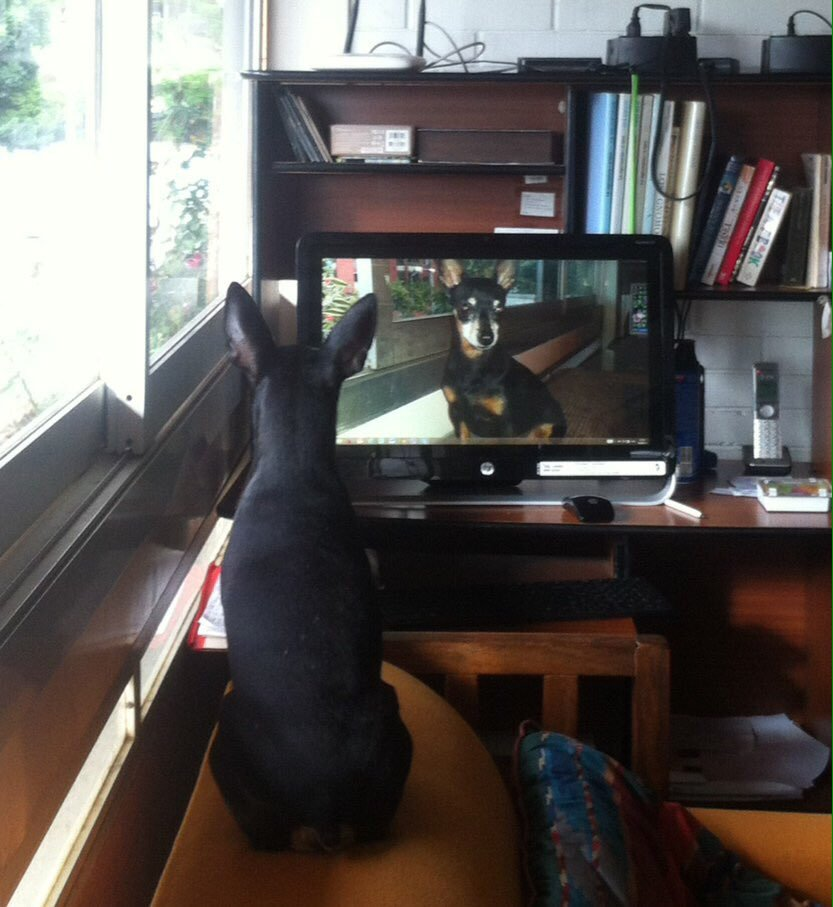

In [46]:
Image(img_predictions_clean.iloc[18].jpg_url)

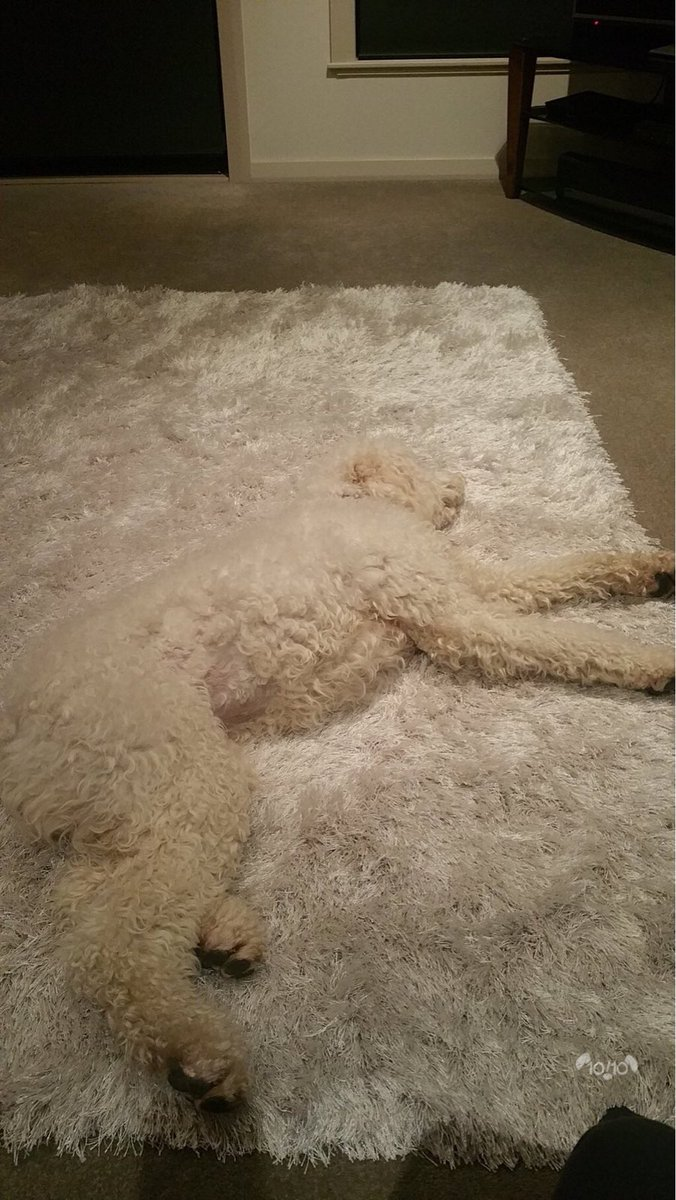

In [47]:
Image(img_predictions_clean.iloc[1979].jpg_url)

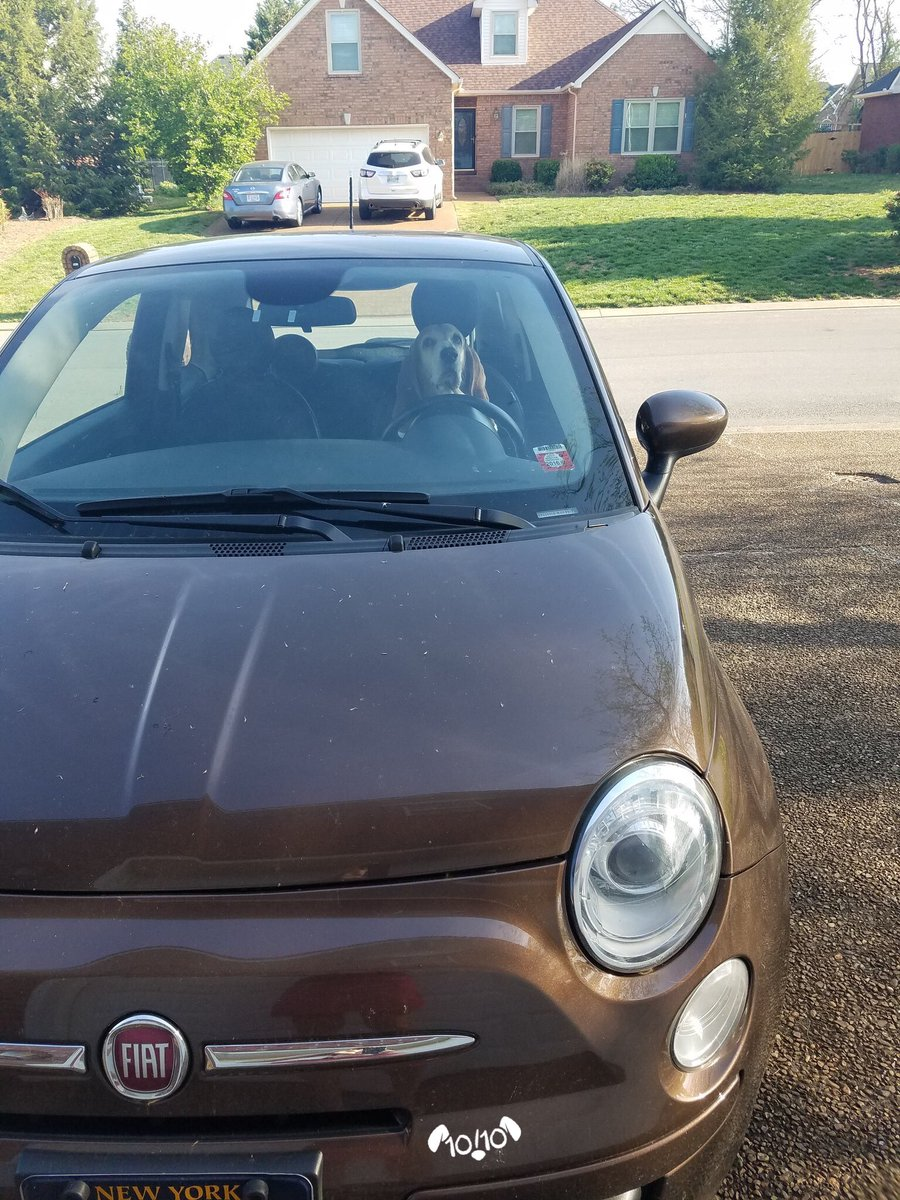

In [48]:
Image(img_predictions_clean.iloc[1910].jpg_url)

**The manual check shows that even with all three predictions as not dogs, there might be dogs in the picture. Therefore, in order to clean this issue, one needs a manual check, or a better prediction algorithm, which is beyond the scope of this project.**

### Define
- **Quality issue 10** The underscore in the breed names is unnecessary.

**Remove underscore in the breed names**

### Code

In [49]:
img_predictions_clean['p1_predict'] = img_predictions_clean['p1_predict'].str.replace('_', ' ')
img_predictions_clean['p2_predict'] = img_predictions_clean['p2_predict'].str.replace('_', ' ')
img_predictions_clean['p3_predict'] = img_predictions_clean['p3_predict'].str.replace('_', ' ')

### Test

In [50]:
img_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1_predict,p1_conf,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
- **Quality issue 11.** The 619 breed names are lower case, but 1532-692 = 840 are upper case.

**Capitalise all the names in p1_predoct, p2_predict, p3_predict**

### Code

In [51]:
img_predictions_clean['p1_predict'] = img_predictions_clean['p1_predict'].str.title()
img_predictions_clean['p2_predict'] = img_predictions_clean['p2_predict'].str.title()
img_predictions_clean['p3_predict'] = img_predictions_clean['p3_predict'].str.title()

### Test

In [52]:
img_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1_predict,p1_conf,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
**Tidiness issue 1** Merge all the tables into the new one on *tweet_id* index

**`merge` in two steps, since `merge` allows merging of two tables only** 

### Code

In [53]:
# Delete the dataframe
#del we_rate_dogs_clean

In [54]:
# Create the dataframe by merging twitter_archive_df with img_predictions
we_rate_dogs_clean = pd.merge(twitter_archive_clean, img_predictions_clean, on='tweet_id', how='inner')
# Merge the result with tweets_df
we_rate_dogs_clean = pd.merge(we_rate_dogs_clean, tweets_clean, on='tweet_id', how='inner')

### Test

In [55]:
we_rate_dogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5900,31940
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3899,24055
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8096,40455
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8778,38673
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,2918,19441


In [56]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 25 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null datetime64[ns, UTC]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1_predict            1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2_predict            1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3_predict            1963

In [57]:
# Check for duplicates tweet_id
we_rate_dogs_clean[we_rate_dogs_clean.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count


### Define
**Tidiness issue 2.** The dog "stage" (i.e. doggo, floofer, pupper, and puppo) is a variable. The 'stage' should be one column.

**- Make the new column `dog_stages`.** 

**- Fill it with the content of 'doggo', 'floofer', 'pupper', and 'puppo' columns.**

**- Remove the 'doggo', 'floofer', 'pupper', and 'puppo' columns.**

### Code

In [58]:
# Get column list
columns = list(we_rate_dogs_clean.columns.values)
#columns
# Fill in the stages list
stages = {'doggo', 'floofer', 'pupper', 'puppo'}
#stages
# Remove 'stages' from 'columns'
columns = [e for e in columns if e not in stages]
columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1_predict',
 'p1_conf',
 'p1_dog',
 'p2_predict',
 'p2_conf',
 'p2_dog',
 'p3_predict',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [59]:
# Use `melt` to melt columns
we_rate_dogs_clean = pd.melt(we_rate_dogs_clean, id_vars=columns, value_vars=stages,
                           var_name='stages', value_name='dog_stage')
we_rate_dogs_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count,stages,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,Papillon,0.068957,True,5900,31940,floofer,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,3899,24055,floofer,None
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8096,40455,floofer,None
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8778,38673,floofer,None
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,2918,19441,floofer,None
5,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,Border Collie,0.199287,True,Ice Lolly,0.193548,False,1937,11340,floofer,None
6,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,17700,62633,floofer,None
7,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,4020,26744,floofer,None
8,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6903,30631,floofer,None
9,890006608113172480,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,Pomeranian,0.013884,True,Chow,0.008167,True,6875,29479,floofer,None


In [60]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 23 columns):
tweet_id              7852 non-null int64
timestamp             7852 non-null datetime64[ns, UTC]
source                7852 non-null object
text                  7852 non-null object
expanded_urls         7852 non-null object
rating_numerator      7852 non-null int64
rating_denominator    7852 non-null int64
name                  7852 non-null object
jpg_url               7852 non-null object
img_num               7852 non-null int64
p1_predict            7852 non-null object
p1_conf               7852 non-null float64
p1_dog                7852 non-null bool
p2_predict            7852 non-null object
p2_conf               7852 non-null float64
p2_dog                7852 non-null bool
p3_predict            7852 non-null object
p3_conf               7852 non-null float64
p3_dog                7852 non-null bool
retweet_count         7852 non-null int64
favorite_count        7852 n

In [61]:
# The number of table entries is multiplied by 4, because there are 4 entries for each stage
we_rate_dogs_clean[we_rate_dogs_clean.tweet_id==890240255349198849]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count,stages,dog_stage
8,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6903,30631,floofer,None
1971,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6903,30631,puppo,None
3934,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6903,30631,doggo,doggo
5897,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,6903,30631,pupper,None


In [62]:
# Drop 'stages' columns
we_rate_dogs_clean = we_rate_dogs_clean.drop('stages',axis=1)

In [63]:
# Remove duplicates
we_rate_dogs_clean.drop_duplicates(inplace=True)

In [64]:
# Reset the index
we_rate_dogs_clean = we_rate_dogs_clean.reset_index(drop=True) 

### Test

In [65]:
we_rate_dogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5900,31940,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3899,24055,None
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8096,40455,None
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8778,38673,None
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,2918,19441,None


In [66]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 22 columns):
tweet_id              2275 non-null int64
timestamp             2275 non-null datetime64[ns, UTC]
source                2275 non-null object
text                  2275 non-null object
expanded_urls         2275 non-null object
rating_numerator      2275 non-null int64
rating_denominator    2275 non-null int64
name                  2275 non-null object
jpg_url               2275 non-null object
img_num               2275 non-null int64
p1_predict            2275 non-null object
p1_conf               2275 non-null float64
p1_dog                2275 non-null bool
p2_predict            2275 non-null object
p2_conf               2275 non-null float64
p2_dog                2275 non-null bool
p3_predict            2275 non-null object
p3_conf               2275 non-null float64
p3_dog                2275 non-null bool
retweet_count         2275 non-null int64
favorite_count        2275 n

In [67]:
we_rate_dogs_clean.dog_stage.value_counts()

None       1963
pupper      209
doggo        72
puppo        23
floofer       8
Name: dog_stage, dtype: int64

## Storing, Analyzing, and Visualizing Data

In [68]:
# Store the clean DataFrame in a CSV file
we_rate_dogs_clean.to_csv('twitter_archive_master.csv', index=False) 

In [70]:
pd.read_csv('twitter_archive_master.csv').head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2_predict,p2_conf,p2_dog,p3_predict,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,5900,31940,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,3899,24055,None
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8096,40455,None
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8778,38673,None
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,2918,19441,None


In [71]:
we_rate_dogs_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.275000e+03,2275.000000,2275.000000,2275.000000,2275.000000,2.275000e+03,2.275000e+03,2275.000000,2275.000000
mean,7.371903e+17,12.068132,10.413626,1.210549,0.597127,1.346958e-01,5.963213e-02,2689.860659,8877.771868
std,6.710262e+16,38.760208,6.380826,0.572050,0.271697,1.017338e-01,5.085633e-02,5054.082888,13442.953622
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,75.000000
25%,6.769489e+17,10.000000,10.000000,1.000000,0.367881,5.295590e-02,1.594050e-02,602.500000,2010.000000
50%,7.105889e+17,11.000000,10.000000,1.000000,0.596461,1.159840e-01,4.881320e-02,1273.000000,3980.000000
75%,7.895651e+17,12.000000,10.000000,1.000000,0.846986,1.957615e-01,9.093490e-02,2967.500000,10812.000000
max,8.921774e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,80261.000000,160450.000000


### Requirements to the project
- three (3) insights and 
- one (1) visualization**

### My questions to the data:
1. Are the `retweet_count` and `favorite_count` correlated with
    1. each other?  
    2. the rating numerator?
    3. the day of a week?
    - the length of the description `text`?
    - the case whether there is an easily recognizible dog on the image?
2. Which dog 'stage' has more retweets and favorite counts?
    1. How the corresponding distributions look like?
    - How the boxplots of the corresponding distributions look like?

**1.A. Are `retweet count` and `favorite count` correlated?**

In [72]:
# Get the `retweet_count` and `favorite_count`
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
# Print correlation coefficients
print(np.corrcoef(b,c))

[[1.         0.93542505]
 [0.93542505 1.        ]]


**1.A. - Yes, the correlation coefficient is 0.93.**

**1.B. Are the `retweet count` and `favorite count` correlated with the `rating numerator`?**

In [73]:
a = we_rate_dogs_clean.rating_numerator
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
print(np.corrcoef(a,b))
print(np.corrcoef(a,c))

[[1.         0.01800779]
 [0.01800779 1.        ]]
[[1.         0.01705335]
 [0.01705335 1.        ]]


**1.B. - No, the correlation coefficient is less than 0.1.**

**1.C. Are the `retweet count` and `favorite count` correlated with a day of a week?**

In [74]:
a = [we_rate_dogs_clean.timestamp[i].dayofweek for i in range(len(we_rate_dogs_clean))]
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
print(np.corrcoef(a,b))
print(np.corrcoef(a,c))

[[1.         0.02167961]
 [0.02167961 1.        ]]
[[1.         0.01281309]
 [0.01281309 1.        ]]


**1.C. - No, the correlation coefficient is less than 0.1.**

**1.D. Are the `retweet count` and `favorite count` correlated with the length of the description `text`?**

In [75]:
a = we_rate_dogs_clean.text.str.len()
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
print(np.corrcoef(a,b))
print(np.corrcoef(a,c))

[[1.         0.03437869]
 [0.03437869 1.        ]]
[[1.        0.1232514]
 [0.1232514 1.       ]]


**1.D. - Yes, the length of the description `text` is slightly correlated with `favorite count` only. The correlation coefficient is 0.12.**

**1.E. Are the `retweet_count` and `favorite_count` correlated with the case whether there is an easily recognizible dog on the image?**

In [76]:
a1 = we_rate_dogs_clean.p1_dog
a2 = we_rate_dogs_clean.p2_dog
a3 = we_rate_dogs_clean.p3_dog
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
print('p1_dog:')
print(np.corrcoef(a1,b))
print(np.corrcoef(a1,c))
print('p2_dog:')
print(np.corrcoef(a2,b))
print(np.corrcoef(a2,c))
print('p3_dog:')
print(np.corrcoef(a3,b))
print(np.corrcoef(a3,c))
a1 = we_rate_dogs_clean.p1_conf
a2 = we_rate_dogs_clean.p2_conf
a3 = we_rate_dogs_clean.p3_conf
b = we_rate_dogs_clean.retweet_count
c = we_rate_dogs_clean.favorite_count
print('p1_conf:')
print(np.corrcoef(a1,b))
print(np.corrcoef(a1,c))
print('p2_conf:')
print(np.corrcoef(a2,b))
print(np.corrcoef(a2,c))
print('p3_conf:')
print(np.corrcoef(a3,b))
print(np.corrcoef(a3,c))

p1_dog:
[[1.         0.01816337]
 [0.01816337 1.        ]]
[[1.         0.05825568]
 [0.05825568 1.        ]]
p2_dog:
[[1.         0.00866386]
 [0.00866386 1.        ]]
[[1.        0.0502928]
 [0.0502928 1.       ]]
p3_dog:
[[1.         0.01279939]
 [0.01279939 1.        ]]
[[1.         0.03860793]
 [0.03860793 1.        ]]
p1_conf:
[[1.         0.04154792]
 [0.04154792 1.        ]]
[[1.        0.0645931]
 [0.0645931 1.       ]]
p2_conf:
[[ 1.         -0.00548444]
 [-0.00548444  1.        ]]
[[ 1.         -0.00754601]
 [-0.00754601  1.        ]]
p3_conf:
[[ 1.         -0.03816147]
 [-0.03816147  1.        ]]
[[ 1.         -0.04758185]
 [-0.04758185  1.        ]]


**1.E. - Yes. There is a week correlation of `p1_dog`, `p2_dog` and `p1_conf` with `favorite_count` only. The correlation coefficient is rounded to 0.1 from below.**

**2. Which dog 'stage' has more retweets and favorite counts?**

In [77]:
# Get the number of each dog 'stage'
we_rate_dogs_clean.dog_stage.value_counts()

None       1963
pupper      209
doggo        72
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [78]:
# we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'None'].describe()
# The tables are hard to compare.

**2.B. How the corresponding distributions look like?**

In [112]:
# Get the retweet count for different dog 'stages'
none_rc    = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'None'].retweet_count
pupper_rc  = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'pupper'].retweet_count
doggo_rc   = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'doggo'].retweet_count
puppo_rc   = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'puppo'].retweet_count
floofer_rc = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'floofer'].retweet_count

In [113]:
#plt.hist(none_rc, bins = 15, rwidth = 0.95, log = True)
#plt.show()
# The individual figures are also hard to compare.

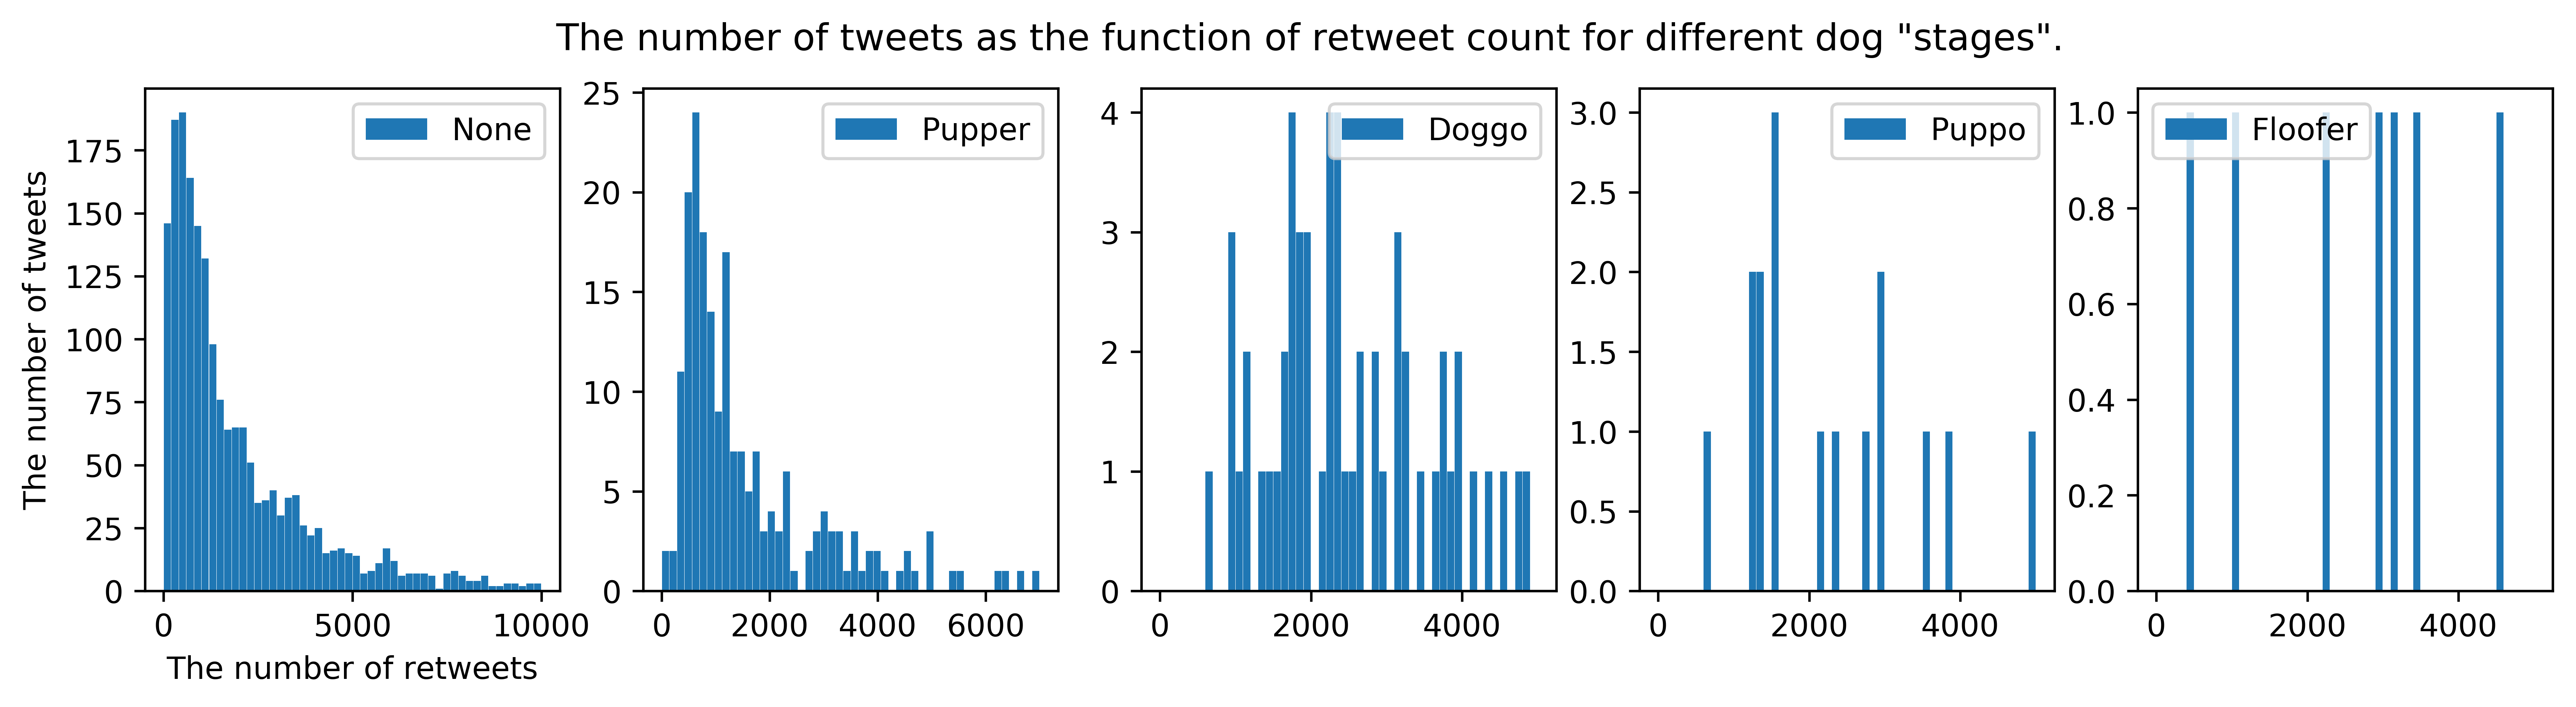

In [114]:
# Plot the retweet count for different dog 'stages'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1 , 5, sharey=False , figsize=(14, 3), dpi=600)
#ax1.set_title('The number of retweet counts for different dog "stages".')
f.suptitle('The number of tweets as the function of retweet count for different dog "stages".')

ax1.hist(none_rc,    bins = 50, rwidth = 0.95, range = (0,10000), label = 'None') 
ax1.set_xlabel('The number of retweets')#, fontsize=18)
ax1.set_ylabel('The number of tweets')#, fontsize=16)

ax2.hist(pupper_rc,  bins = 50, rwidth = 0.95, range = (0,7000), label = 'Pupper')
ax3.hist(doggo_rc,   bins = 50, rwidth = 0.95, range = (0,5000), label = 'Doggo')
ax4.hist(puppo_rc,   bins = 50, rwidth = 0.95, range = (0,5000), label = 'Puppo')
ax5.hist(floofer_rc, bins = 50, rwidth = 0.95, range = (0,5000), label = 'Floofer')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

#plt.show()

plt.savefig('retweet_count_distributions.png', dpi=600, bbox_inches = 'tight', pad_inches = 0.1)
plt.savefig('retweet_count_distributions.pdf', dpi=600, bbox_inches = 'tight', pad_inches = 0.1)

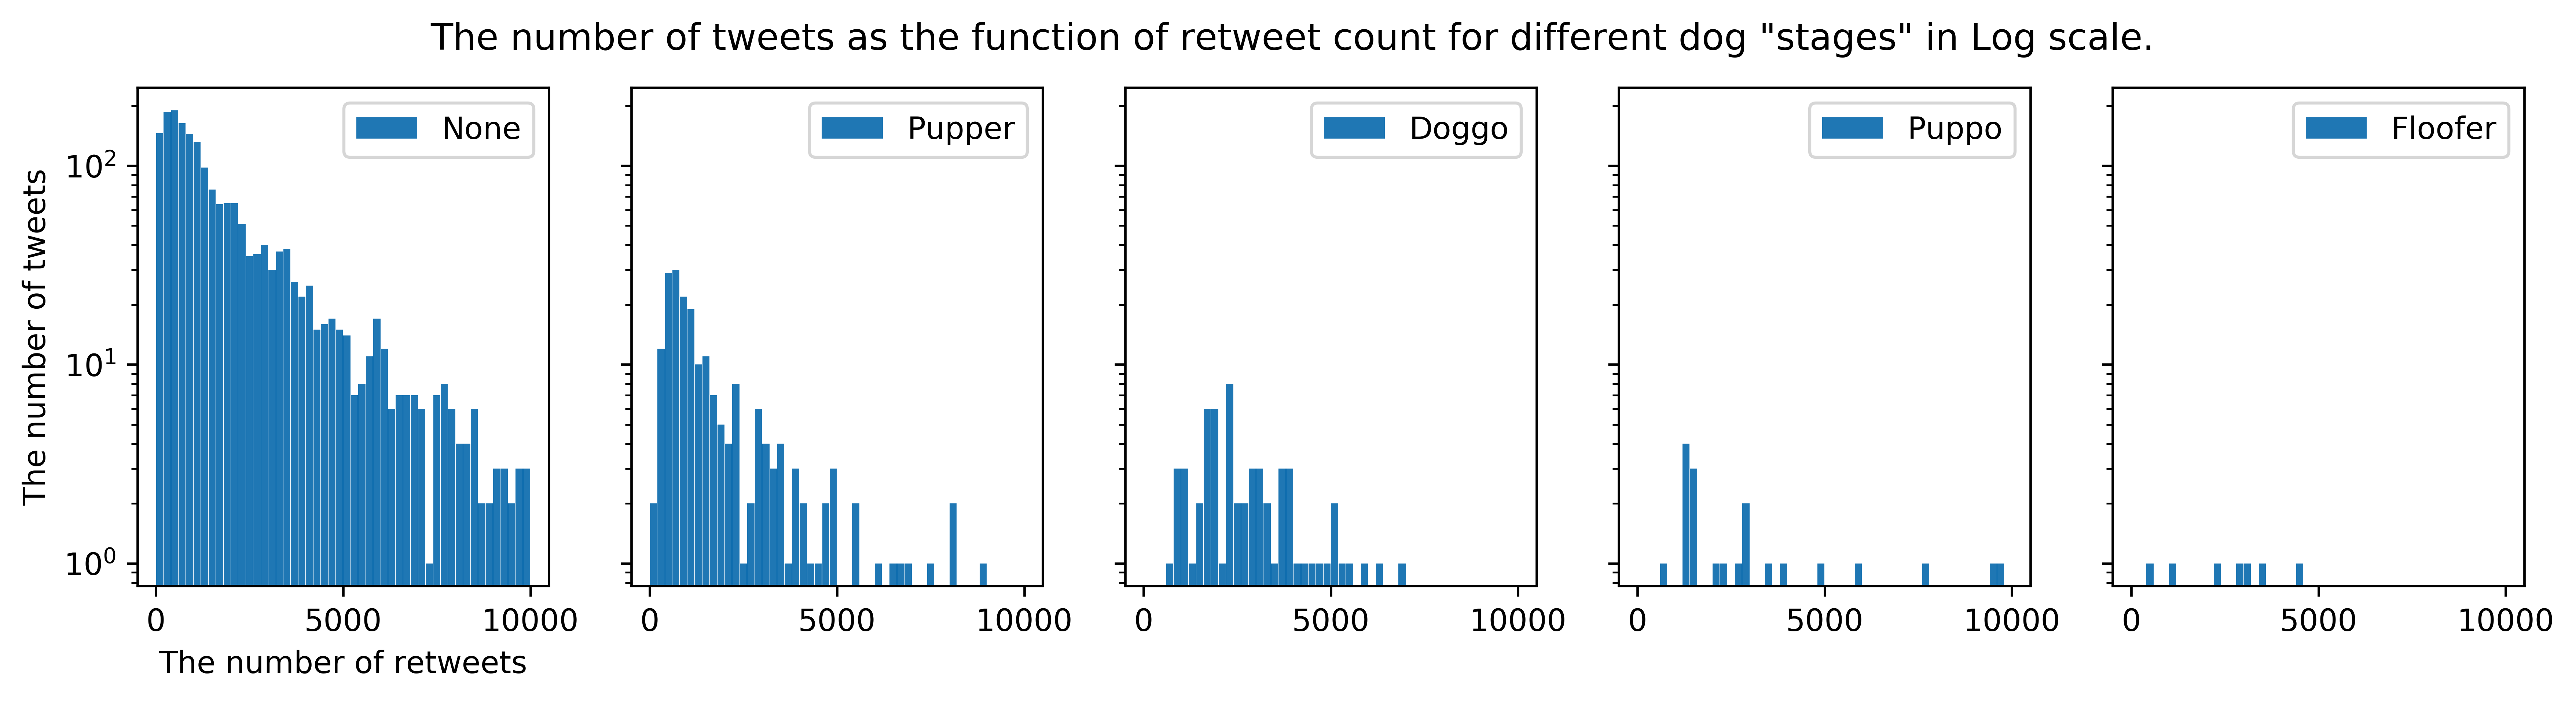

In [90]:
# Plot the retweet count for different dog 'stages'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1 , 5, sharey=True , figsize=(14, 3), dpi=600)
#ax1.set_title('The number of retweet counts for different dog "stages".')
f.suptitle('The number of tweets as the function of retweet count for different dog "stages" in Log scale.')

ax1.hist(none_rc,    bins = 50, rwidth = 0.95, log = True, range = (0,10000), label = 'None') 
ax2.hist(pupper_rc,  bins = 50, rwidth = 0.95, log = True, range = (0,10000), label = 'Pupper')
ax3.hist(doggo_rc,   bins = 50, rwidth = 0.95, log = True, range = (0,10000), label = 'Doggo')
ax4.hist(puppo_rc,   bins = 50, rwidth = 0.95, log = True, range = (0,10000), label = 'Puppo')
ax5.hist(floofer_rc, bins = 50, rwidth = 0.95, log = True, range = (0,10000), label = 'Floofer')

ax1.set_xlabel('The number of retweets')
ax1.set_ylabel('The number of tweets')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

plt.show()

In [105]:
# Get the favorite count for different dog 'stages'
none_fc    = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'None'].favorite_count
pupper_fc  = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'pupper'].favorite_count
doggo_fc   = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'doggo'].favorite_count
puppo_fc   = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'puppo'].favorite_count
floofer_fc = we_rate_dogs_clean.loc[we_rate_dogs_clean.dog_stage == 'floofer'].favorite_count

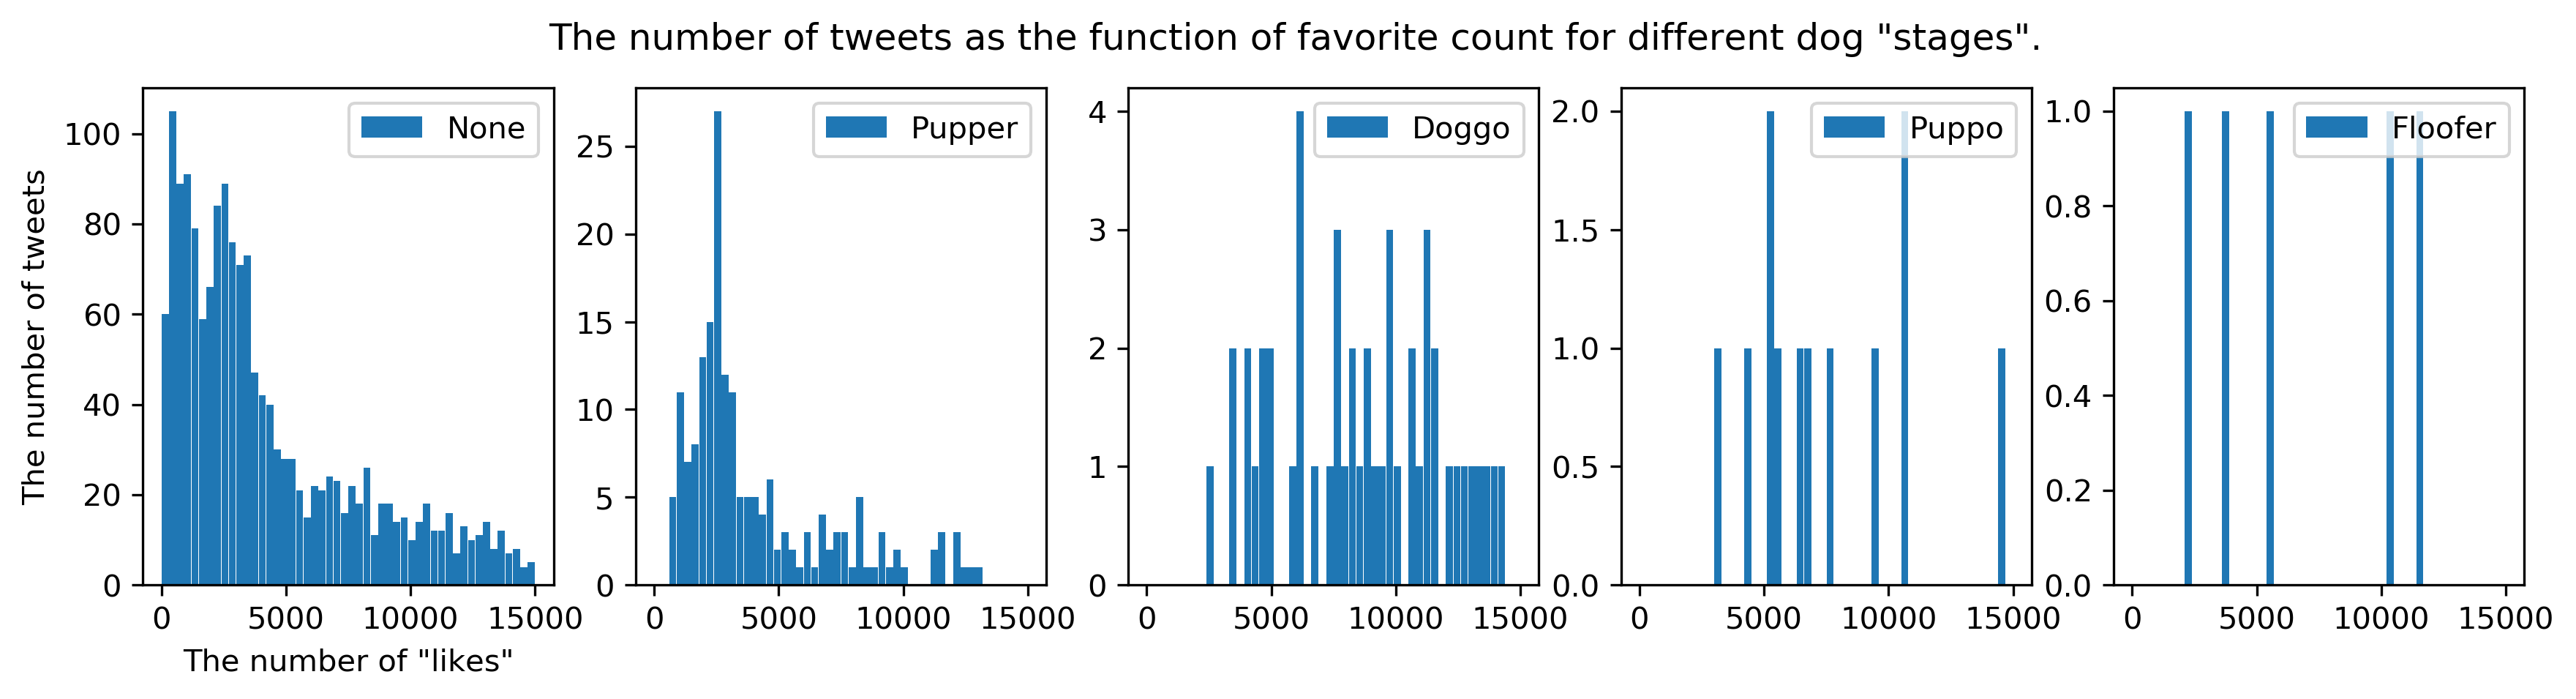

In [115]:
# Plot the favorite count for different dog 'stages'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1 , 5, sharey=False , figsize=(14, 3), dpi=300)
#ax1.set_title('The number of retweet counts for different dog "stages".')
f.suptitle('The number of tweets as the function of favorite count for different dog "stages".')

ax1.hist(none_fc,    bins = 50, rwidth = 0.95, range = (0,15000), label = 'None') 
ax2.hist(pupper_fc,  bins = 50, rwidth = 0.95, range = (0,15000), label = 'Pupper')
ax3.hist(doggo_fc,   bins = 50, rwidth = 0.95, range = (0,15000), label = 'Doggo')
ax4.hist(puppo_fc,   bins = 50, rwidth = 0.95, range = (0,15000), label = 'Puppo')
ax5.hist(floofer_fc, bins = 50, rwidth = 0.95, range = (0,15000), label = 'Floofer')

ax1.set_xlabel('The number of "likes"')
ax1.set_ylabel('The number of tweets')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

#plt.show()
plt.savefig('favorite_count_distributions.png', dpi=600, bbox_inches = 'tight', pad_inches = 0.1)
plt.savefig('favorite_count_distributions.pdf', dpi=600, bbox_inches = 'tight', pad_inches = 0.1)

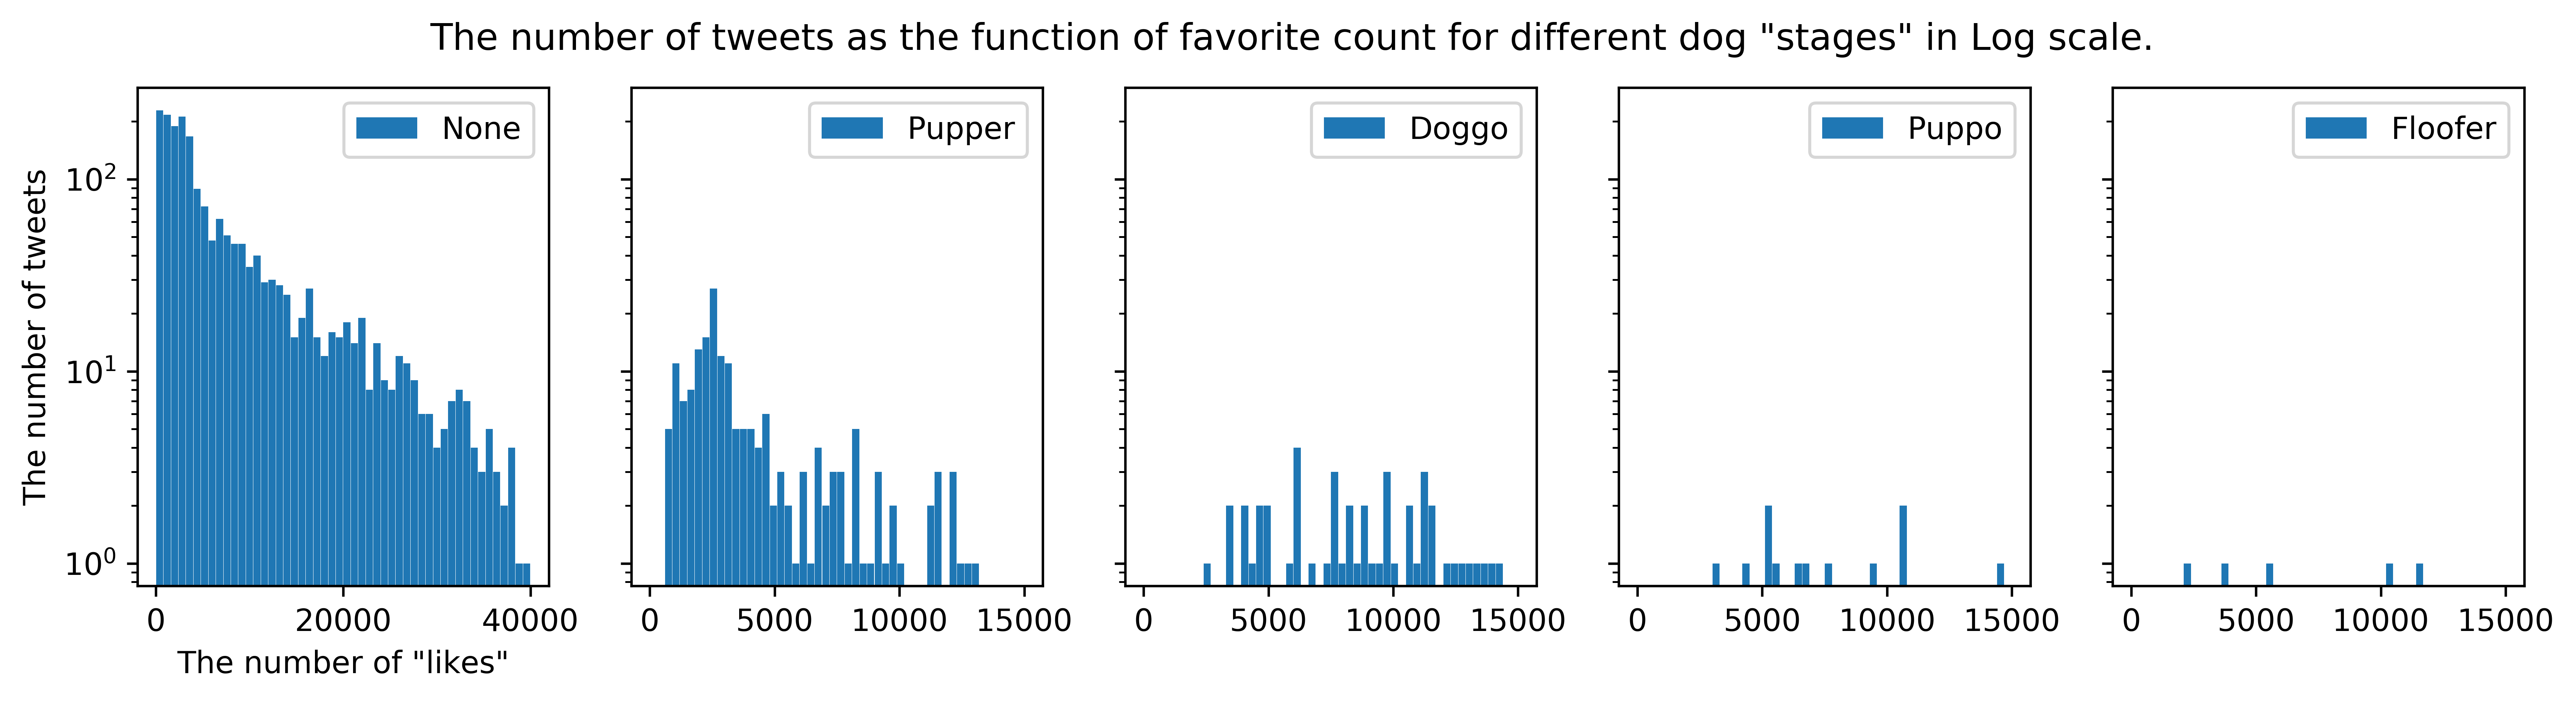

In [93]:
# Plot the favorite count for different dog 'stages'
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1 , 5, sharey=True , figsize=(14, 3), dpi=600)
f.suptitle('The number of tweets as the function of favorite count for different dog "stages" in Log scale.')

ax1.hist(none_fc,    bins = 50, rwidth = 0.95, log = True, range = (0,40000), label = 'None') 
ax2.hist(pupper_fc,  bins = 50, rwidth = 0.95, log = True, range = (0,15000), label = 'Pupper')
ax3.hist(doggo_fc,   bins = 50, rwidth = 0.95, log = True, range = (0,15000), label = 'Doggo')
ax4.hist(puppo_fc,   bins = 50, rwidth = 0.95, log = True, range = (0,15000), label = 'Puppo')
ax5.hist(floofer_fc, bins = 50, rwidth = 0.95, log = True, range = (0,15000), label = 'Floofer')

ax1.set_xlabel('The number of "likes"')
ax1.set_ylabel('The number of tweets')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

plt.show()

**2.B. How the boxplots of the corresponding distributions look like?**

**To do:** 
- merge all `_rc` data into one table and then plot it with boxplot,
- do the same with `_fc`.

In [94]:
# Convert to DataFrame, reset the index, and rename the columns
none_rc    = pd.DataFrame(none_rc).reset_index(drop=True).rename(columns={'retweet_count':'none_rc'})
pupper_rc  = pd.DataFrame(pupper_rc).reset_index(drop=True).rename(columns={'retweet_count':'pupper_rc'})
doggo_rc   = pd.DataFrame(doggo_rc).reset_index(drop=True).rename(columns={'retweet_count':'doggo_rc'})
puppo_rc   = pd.DataFrame(puppo_rc).reset_index(drop=True).rename(columns={'retweet_count':'puppo_rc'})
floofer_rc = pd.DataFrame(floofer_rc).reset_index(drop=True).rename(columns={'retweet_count':'floofer_rc'})

In [95]:
# Convert to DataFrame, reset the index, and rename the columns
none_fc    = pd.DataFrame(none_fc).reset_index(drop=True).rename(columns={'favorite_count':'none_fc'})
pupper_fc  = pd.DataFrame(pupper_fc).reset_index(drop=True).rename(columns={'favorite_count':'pupper_fc'})
doggo_fc   = pd.DataFrame(doggo_fc).reset_index(drop=True).rename(columns={'favorite_count':'doggo_fc'})
puppo_fc   = pd.DataFrame(puppo_fc).reset_index(drop=True).rename(columns={'favorite_count':'puppo_fc'})
floofer_fc = pd.DataFrame(floofer_fc).reset_index(drop=True).rename(columns={'favorite_count':'floofer_fc'})

In [96]:
# Initialize a joined DataFrame with none_rc
#del retweet_count_clean
retweet_count_clean = none_rc
# Join the rest on index
retweet_count_clean = retweet_count_clean.join([pupper_rc,doggo_rc,puppo_rc,floofer_rc], how = 'outer')

In [97]:
retweet_count_clean

,none_rc,pupper_rc,doggo_rc,puppo_rc,floofer_rc
0,5900,2995.0,6903.0,9418.0,3483.0
1,3899,4602.0,2802.0,2117.0,3147.0
2,8096,14994.0,5126.0,3865.0,2962.0
3,8778,3151.0,3292.0,9756.0,16632.0
4,2918,3894.0,2999.0,2391.0,2297.0
5,1937,1510.0,3427.0,1532.0,4567.0
6,17700,3309.0,17727.0,17727.0,1035.0
7,4020,33966.0,3147.0,17995.0,455.0
8,6903,7453.0,11747.0,1328.0,NaN
9,6875,4914.0,1840.0,45285.0,NaN


In [100]:
# Initialize a joined DataFrame with none_fc
#del favorite_count_clean
favorite_count_clean = none_fc
# Join the rest on index
#favorite_count_clean = favorite_count_clean.merge(pupper_fc, left_index=True, right_index=True, how = 'outer')
favorite_count_clean = favorite_count_clean.join([pupper_fc,doggo_fc,puppo_fc,floofer_fc], how = 'outer')

In [101]:
favorite_count_clean

,none_fc,pupper_fc,doggo_fc,puppo_fc,floofer_fc
0,31940,20312.0,30631.0,46151.0,21775.0
1,24055,27158.0,19563.0,14524.0,16177.0
2,40455,47486.0,26324.0,18631.0,11679.0
3,38673,19926.0,19498.0,33237.0,31168.0
4,19441,25088.0,15503.0,15678.0,5639.0
5,11340,6943.0,15344.0,18310.0,10498.0
6,62633,19582.0,45276.0,45276.0,3745.0
7,26744,119270.0,16177.0,53977.0,2123.0
8,30631,31921.0,45268.0,6555.0,NaN
9,29479,20594.0,7752.0,136808.0,NaN


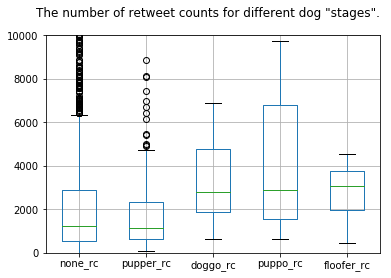

In [102]:
retweet_count_clean.boxplot().set_ylim(0, 10000)
plt.suptitle('The number of retweet counts for different dog "stages".')
# Save figure to file
plt.savefig('retweet_count_boxplot.png', dpi=300) #, bbox_inches='tight', dpi=300)
plt.savefig('retweet_count_boxplot.pdf', dpi=300) #, bbox_inches='tight', dpi=300)
#plt.show()

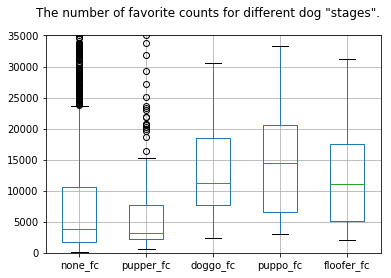

In [103]:
favorite_count_clean.boxplot().set_ylim(0, 35000)
plt.suptitle('The number of favorite counts for different dog "stages".')
plt.savefig('favorite_count_boxplot.png', dpi=300)#, bbox_inches='tight', dpi=300)
plt.savefig('favorite_count_boxplot.pdf', dpi=300)#, bbox_inches='tight', dpi=300)
#plt.show()